# PART 1

# DOMAIN: 
## Semiconductor manufacturing process

## CONTEXT: 
A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/ variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

## DATA DESCRIPTION: 
sensor-data.csv : (1567, 592)

The data consists of 1567 examples each with 591 features.

The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

## PROJECT OBJECTIVE: 
We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.

## 1. Import and explore the data.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering 
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA


In [2]:
# Importing Data files
data = pd.read_csv('signal-data.csv')

# explore shape and size of each
print(data.size,data.shape)

927664 (1567, 592)


In [3]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [5]:
data.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

## 2. Data cleansing:

In [6]:
# Explore for null values
data.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [7]:
# Replace Null values with 0
data = data.replace(np.NaN, 0)

# Explore for null values
data.isnull().any().any()

False

In [8]:
#Drop columns with very low standard deviation thresholds 
threshold = 0.1
new_data=data.drop(data.std()[data.std() < threshold].index.values, axis=1)

In [9]:
# function to delete higly correlated columns
def correlation(data, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in data.columns:
                    del data[colname] # deleting the column from the dataset

    return data

In [10]:
new_data = correlation(new_data,0.75)

# Drop Time column as it's not important for prediction
new_data.drop(columns='Time',axis=1, inplace=True)

# Replace the Pass value as 0 in "Pass/Fail" Column for better understanding
new_data['Pass/Fail'].replace({-1: 0},inplace=True)

new_data.head()

,0,1,2,3,4,12,14,15,16,19,...,562,564,569,570,571,572,581,585,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,202.4396,7.9558,414.8710,10.0433,12.5190,...,0.000,0.00,0.0000,533.8500,2.1113,8.95,0.0000,2.3630,0.0000,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,200.5470,10.1548,414.7347,9.2599,12.4608,...,0.000,0.00,0.0000,535.0164,2.4335,5.92,208.2045,4.4447,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,202.0179,9.5157,416.7075,9.3144,12.5404,...,267.064,1.10,68.8489,535.0245,2.0293,11.21,82.8602,3.1745,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,201.8482,9.6052,422.2894,9.6924,12.4782,...,268.228,7.32,25.0363,530.5682,2.0253,9.33,73.8432,2.0544,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,201.9424,10.5661,420.5925,10.3387,12.4735,...,0.000,0.00,0.0000,532.0155,2.0275,8.83,0.0000,99.3032,73.8432,0


In [11]:
print(new_data.size,new_data.shape)

239751 (1567, 153)


## 3. Data analysis & visualisation:

In [12]:
new_data.describe()

,0,1,2,3,4,12,14,15,16,19,...,562,564,569,570,571,572,581,585,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3002.910638,2484.700932,2180.887035,1383.901023,4.159516,199.701600,8.988130,412.295188,9.888635,12.401385,...,216.957377,5.322151,17.438590,530.523623,2.101836,28.450165,38.623767,3.065869,99.606461,0.066369
std,200.204648,184.815753,209.206773,458.937272,56.104457,7.848224,2.821529,24.945317,2.440326,1.017643,...,99.925253,3.421456,12.260744,17.499736,0.275112,86.304681,72.871466,3.577730,93.895701,0.249005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,317.196400,0.980200,3.540000,0.000000,0.000000,0.000000,0.000000
25%,2965.670000,2451.515000,2180.700000,1080.116050,1.011000,198.128450,7.080300,406.092900,9.565100,12.460000,...,250.420000,4.045000,12.593550,530.702700,1.982900,7.500000,0.000000,2.306200,44.368600,0.000000
50%,3010.920000,2498.910000,2200.955600,1283.436800,1.310100,199.525100,8.956500,412.198800,9.850800,12.499600,...,264.272000,4.980000,15.466200,532.398200,2.118600,8.650000,0.000000,2.757600,71.778000,0.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,202.006750,10.858700,419.082800,10.127750,12.547100,...,264.733000,7.310000,23.035200,534.356400,2.290650,10.130000,57.449750,3.294950,114.749700,0.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,272.045100,19.546500,824.927100,102.867700,12.989800,...,311.404000,32.580000,84.802400,589.508200,2.739500,454.560000,737.304800,99.303200,737.304800,1.000000


C:\Users\Roshan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pass/Fail', ylabel='Density'>

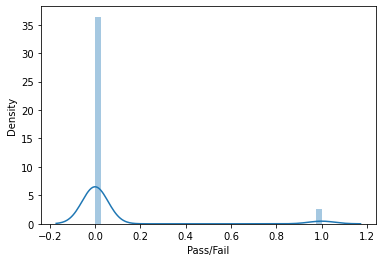

In [13]:
sns.distplot(new_data['Pass/Fail'])

Data is not balanced for Trgeted variable, Pass data is higher than Fail data

C:\Users\Roshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0'>

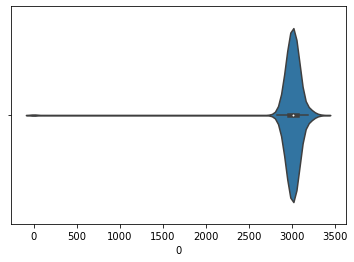

In [14]:
sns.violinplot(new_data['0'])

for Feature 0, all data lies between 2500 & 3500

C:\Users\Roshan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

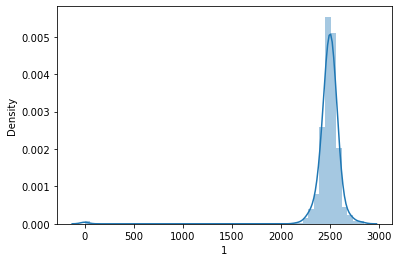

In [15]:
sns.distplot(new_data['1'])

Feature 1 data is normally distributed

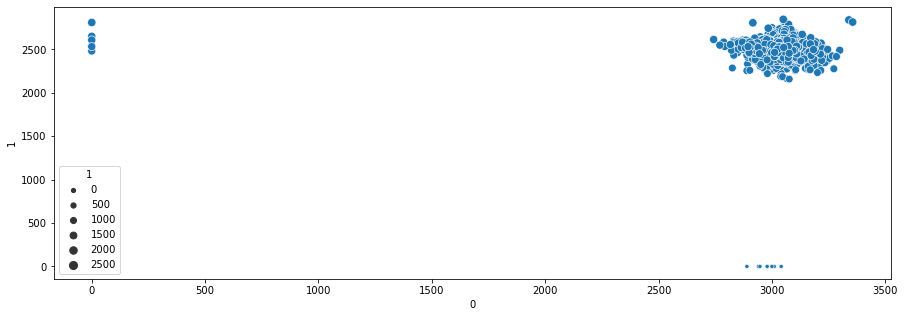

In [16]:
# scatter plot
figure = plt.figure(figsize=(15,5))
ax = sns.scatterplot(x=new_data['0'],y='1', data=new_data, size = "1") 

As per above graph, most of the data for feature 0 & 1 is higher than 2500 & few data is missing

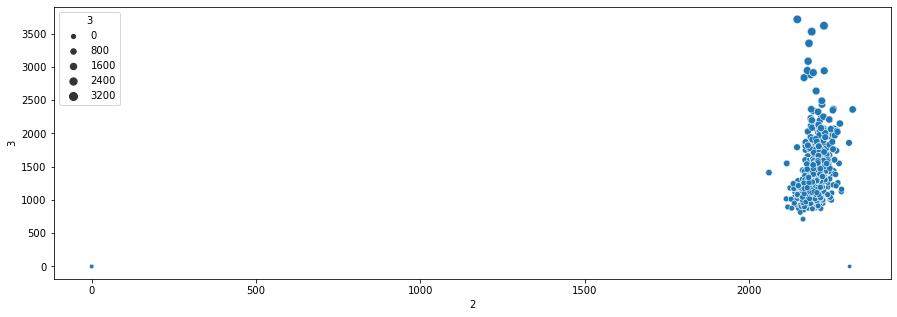

In [17]:
# scatter plot
figure = plt.figure(figsize=(15,5))
ax = sns.scatterplot(x=new_data['2'],y='3', data=new_data, size = "3") 

All the data of feature 2 is greater than 2000, but most of the data for feature 3 lies between 500 to 2500

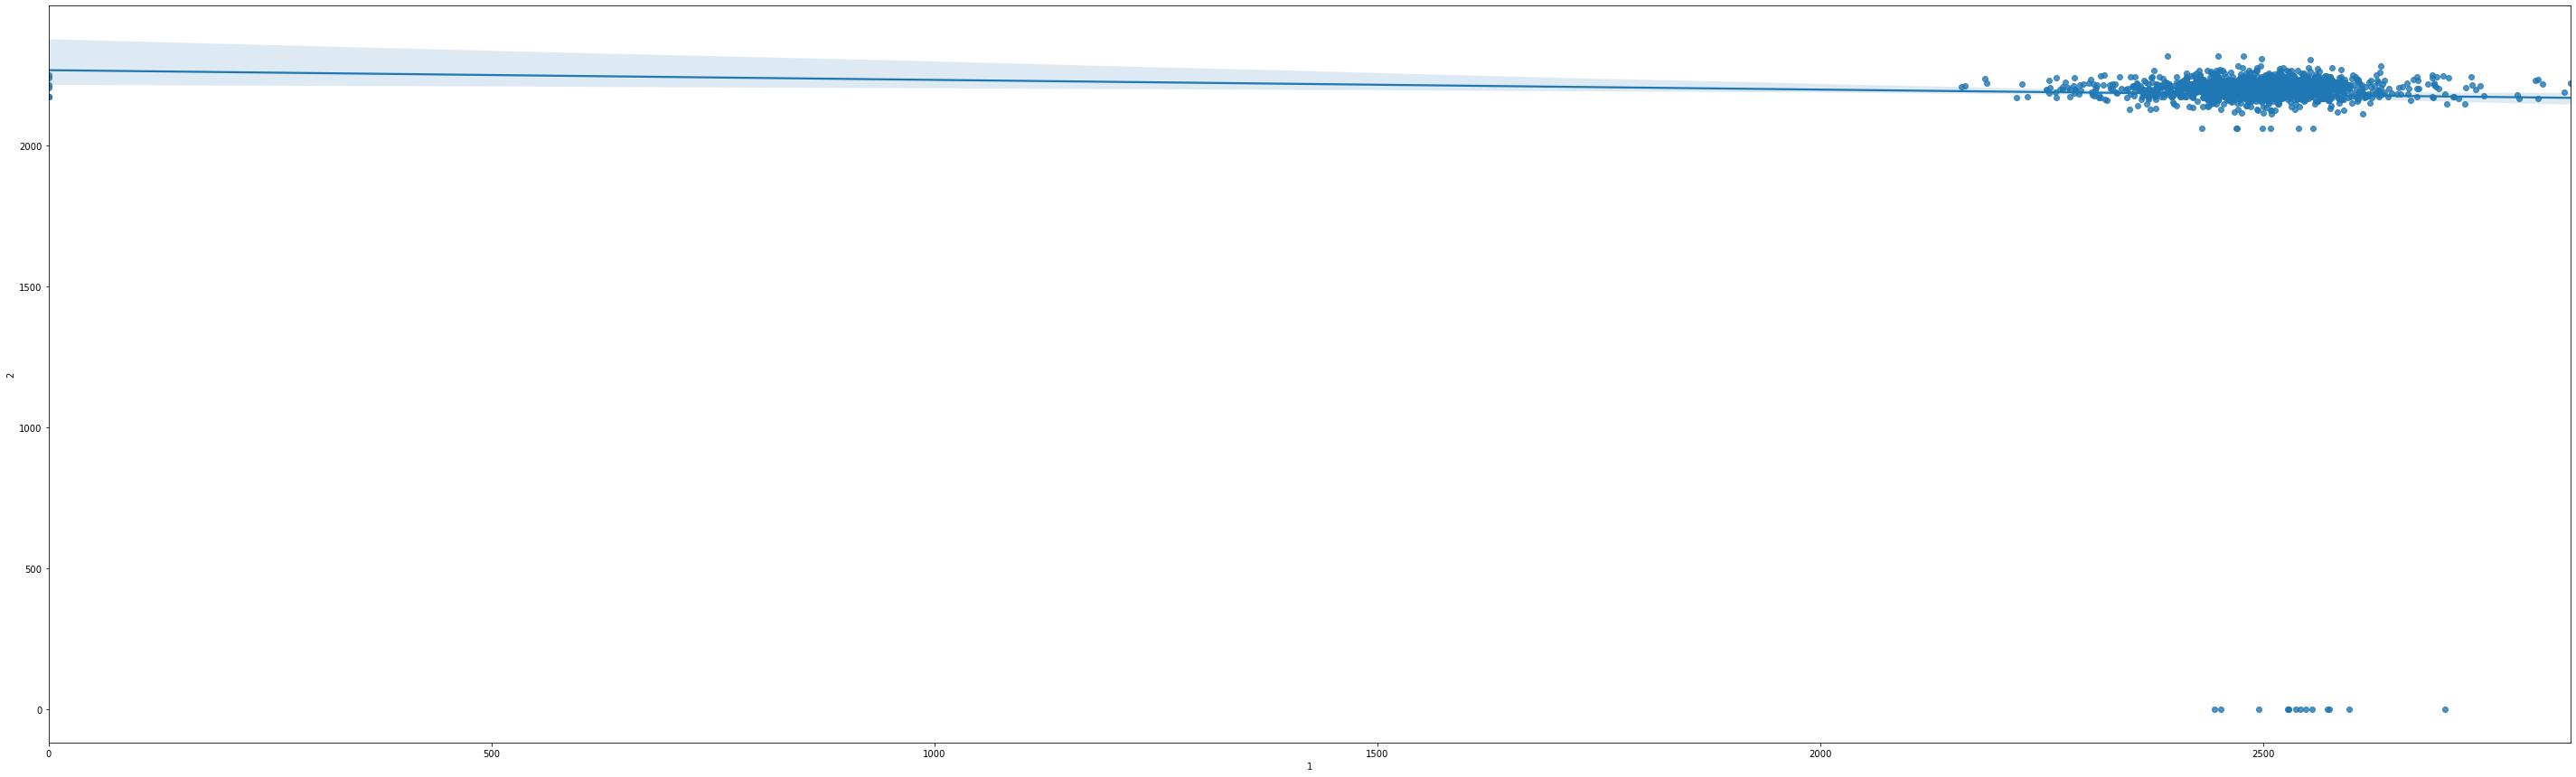

In [18]:
 # regression plot - scatter plot with a regression line
figure = plt.figure(figsize=(50,15))
ax = sns.regplot(x='1',y='2', data=new_data )

## 4. Data pre-processing:

In [19]:
# Transform data into features and target
x = new_data.drop('Pass/Fail',axis=1) 
y = new_data['Pass/Fail']

In [20]:
# Check for target balancing
pd.value_counts(y)

0    1463
1     104
Name: Pass/Fail, dtype: int64

<AxesSubplot:>

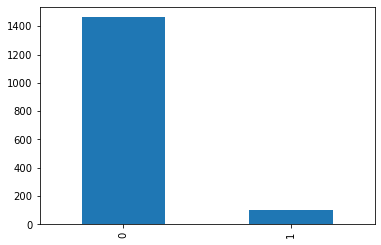

In [21]:
# Check for target balancing
pd.value_counts(y).plot(kind="bar")

In [22]:
# use SMOTE Oversampling method to balance the data

print("Before UpSampling, counts of label '1': {}".format(sum(y==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x, y = sm.fit_sample(x, y.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y==0)))



print('After UpSampling, the shape of train_X: {}'.format(x.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y.shape))


Before UpSampling, counts of label '1': 104
Before UpSampling, counts of label '0': 1463 

After UpSampling, counts of label '1': 1463
After UpSampling, counts of label '0': 1463 

After UpSampling, the shape of train_X: (2926, 152)
After UpSampling, the shape of train_y: (2926,) 



In [23]:
# Perform normalisation
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_std = pd.DataFrame(StandardScaler().fit_transform(x))

In [24]:
# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=6)

<AxesSubplot:>

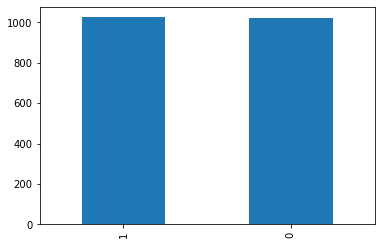

In [25]:
# Check for target balancing for train data
pd.value_counts(y_train).plot(kind="bar")

<AxesSubplot:>

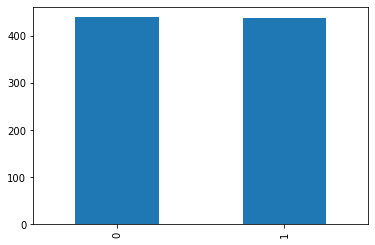

In [26]:
# Check for target balancing for test data
pd.value_counts(y_test).plot(kind="bar")

## 5. Model training, testing and tuning:

### Random Forest Classifier

Confusion Matrix


<AxesSubplot:>

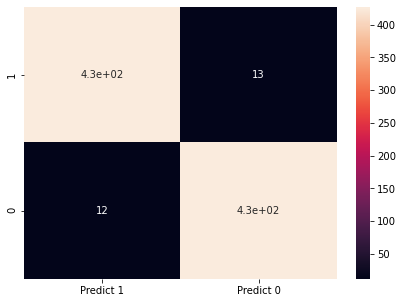

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)

y_pred = rfcl.predict(x_test)


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [28]:
print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       440
           1       0.97      0.97      0.97       438

    accuracy                           0.97       878
   macro avg       0.97      0.97      0.97       878
weighted avg       0.97      0.97      0.97       878



In [29]:
# Apply K-Fold validation technique

num_folds = 10
seed = 77

kfold = KFold(n_splits=num_folds, random_state=seed)

results = cross_val_score(rfcl,X_std, y, cv=kfold)
results

C:\Users\Roshan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


array([0.64846416, 0.92150171, 0.98634812, 0.98634812, 0.97269625,
       0.99658703, 0.97260274, 0.99657534, 0.98630137, 0.99657534])

In [30]:
print('Accuracy Score :')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score :
Avearge:  0.9464000187012015
Standard deviation:  0.1015388871324581


### Logistic Regression 

Confusion Matrix


<AxesSubplot:>

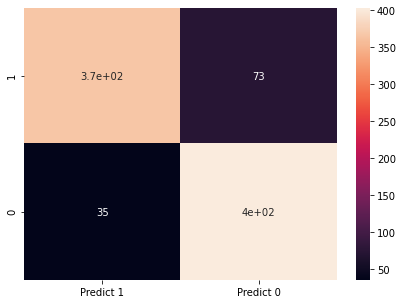

In [31]:
# Fit the model on train
LogReg = LogisticRegression(solver="liblinear")
LogReg.fit(x_train, y_train)

#predict on test
y_pred = LogReg.predict(x_test)


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [32]:
print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       440
           1       0.85      0.92      0.88       438

    accuracy                           0.88       878
   macro avg       0.88      0.88      0.88       878
weighted avg       0.88      0.88      0.88       878



In [33]:
# Apply K-Fold Validation with Logistic Regression
results = cross_val_score(LogReg,X_std, y, cv=kfold)
print('Accuracy Score :')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score :
Avearge:  0.7667866660432934
Standard deviation:  0.1733774793335403


In [34]:
#Apply Grid Search Technique with Logistic Regression

# define models and parameters
LogReg = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

# define grid search
grid_search = GridSearchCV(estimator=LogReg, param_grid=param_grid, n_jobs=-1, cv=kfold, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_std, y)

# summarize results
print("Best Score for Logistic Rgression : %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Score for Logistic Rgression : 0.770880 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


Confusion Matrix


<AxesSubplot:>

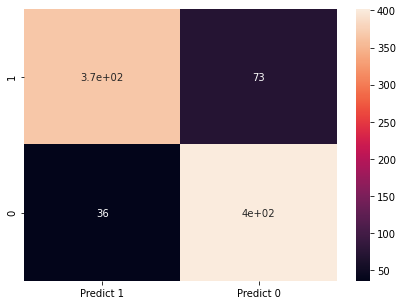

In [35]:
# Fit the model on train
LogReg = LogisticRegression(C= 10, penalty = 'l2', solver = 'newton-cg')
LogReg.fit(x_train, y_train)

#predict on test
y_pred = LogReg.predict(x_test)


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [36]:
print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       440
           1       0.85      0.92      0.88       438

    accuracy                           0.88       878
   macro avg       0.88      0.88      0.88       878
weighted avg       0.88      0.88      0.88       878



### Ridge Regression

In [37]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))

print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))


Ridge model: [ 7.90719357e-03 -3.32232044e-02  1.54489637e-02 -3.87596053e-03
 -2.22017741e-03 -1.16858721e-02 -5.87191724e-02  1.90963509e-02
  8.95303117e-03 -9.69203253e-03 -3.21306492e-03 -6.56460020e-02
  4.48867408e-03  1.00384559e-02  8.53851561e-02 -1.10960962e-02
  1.39405810e-02 -2.94100498e-02  1.81801894e-02  2.54483706e-02
 -5.37980421e-03 -1.60784891e-02 -2.61915599e-02 -6.16028722e-02
  1.74638468e-01  3.64066383e-02 -4.31111028e-02 -2.93374269e-02
  2.58508047e-01  7.76419778e-02 -1.62978654e-01  9.07073630e-02
  1.51087234e-02 -5.29536678e-02  4.34608499e-02  1.50933294e-02
 -1.19895188e-02 -4.49187968e-03  2.28999091e-02  7.58542268e-03
 -3.56895518e-02 -3.85795414e-02  8.44097872e-02 -1.31375664e-02
 -3.58868140e-02 -6.54913074e-03  1.54067008e-03  2.13197105e-02
  9.78644350e-03 -2.20645916e-02  6.55326529e-02 -3.06771170e-02
  5.75187544e-02 -3.63014769e-02 -2.13080977e-03 -6.86573005e-03
  7.00344939e-03  2.17825047e-02 -1.98563425e-03 -3.53038332e-02
  3.14160836

### SVM Model

Confusion Matrix


<AxesSubplot:>

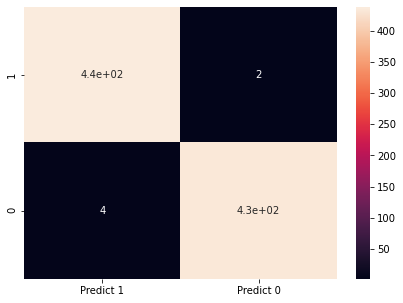

In [38]:
clf = svm.SVC(gamma=0.025, C=3)    
clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [39]:
# Apply K-Fold Validation with SVM


results = cross_val_score(clf,X_std, y, cv=kfold)
print('Accuracy Score :')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score :
Avearge:  0.9965823554163353
Standard deviation:  0.0034153149336328954


In [40]:
# Find best parameters for SVM using grid search method

clf = svm.SVC() 

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.025,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1, cv=kfold, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_std, y)

# summarize results
print("Best Score for SVM : %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Score for SVM : 0.996582 using {'C': 10, 'gamma': 0.025, 'kernel': 'rbf'}


Confusion Matrix


<AxesSubplot:>

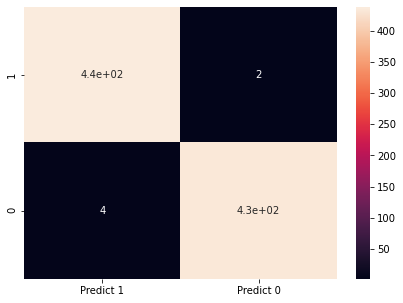

In [41]:
#Train SVM model using best Parameters
clf = svm.SVC(gamma=0.025, C=10, kernel='rbf')    
clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [42]:
print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       440
           1       1.00      0.99      0.99       438

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878



## PCA : perform dimensional reduction on the data

In [43]:
# train PCA model
pca = PCA(n_components=152)
pca.fit(X_std)

PCA(n_components=152)

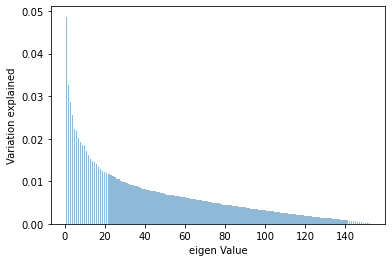

In [44]:
# Plot variation graph for different n_components

plt.bar(list(range(1,153)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

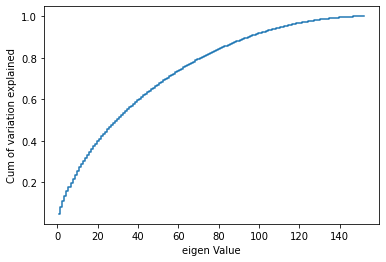

In [45]:
plt.step(list(range(1,153)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

As per above graph, 110 dimensions seems very reasonable. With 1103 variables we can explain over 90% of the variation in the original data!

In [46]:
#Apply PCA with 110 Dimensions

pca110 = PCA(n_components=110)
pca110.fit(X_std)
print(pca110.components_)
print(pca110.explained_variance_ratio_)
Xpca110 = pca110.transform(X_std)

[[-0.0498048   0.00582876  0.03226198 ...  0.06775329  0.01540531
   0.05286103]
 [-0.01024815  0.05135308  0.02353164 ...  0.1398445   0.00030307
   0.03248491]
 [-0.00077593 -0.00316033 -0.00061208 ...  0.01426376  0.03346328
   0.01284342]
 ...
 [ 0.00307641  0.02381418  0.27760904 ...  0.00254667  0.02371801
  -0.12718944]
 [ 0.00697042 -0.0473992  -0.07770445 ... -0.18835476 -0.01502305
   0.10375408]
 [-0.04561078  0.09007454  0.05031162 ... -0.19930032  0.03947475
   0.15725988]]
[0.04866707 0.03250494 0.02860302 0.02548421 0.02232569 0.02189148
 0.02016716 0.01913106 0.01846244 0.01817607 0.01702231 0.0161831
 0.01526118 0.01486779 0.01455755 0.01410049 0.01338847 0.01295292
 0.01234278 0.01215617 0.01204369 0.01161817 0.01151905 0.01117983
 0.01106422 0.01058208 0.01053878 0.01014459 0.00987958 0.00980346
 0.00962728 0.00936057 0.0091976  0.00913495 0.00885063 0.00879882
 0.00864645 0.0083113  0.00825044 0.00814144 0.00803706 0.00798598
 0.00776144 0.00761658 0.00759617 0.0075

In [47]:
# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(Xpca110, y, test_size=0.3, random_state=6)

### Random Forest Classifier after dimensional reduction using PCA

Confusion Matrix


<AxesSubplot:>

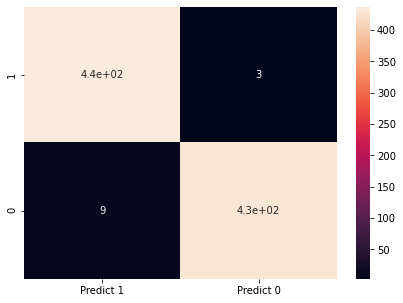

In [48]:
# Train Random Forest Model using PCA
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)

y_pred = rfcl.predict(x_test)


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [49]:
print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       440
           1       0.99      0.98      0.99       438

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878



In [50]:
# run randomized search on Random Forest Model

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": range(1, 11),
              "min_samples_split": range(2, 11),
              "min_samples_leaf": range(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(rfcl, param_distributions=param_dist, n_iter=samples) #default cv = 3

randomCV_result = randomCV.fit(Xpca110, y)

# summarize results
print("Best Score for Random Forest Classifier : %f using %s" % (randomCV_result.best_score_, randomCV_result.best_params_))


Best Score for Random Forest Classifier : 0.995903 using {'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}


Confusion Matrix


<AxesSubplot:>

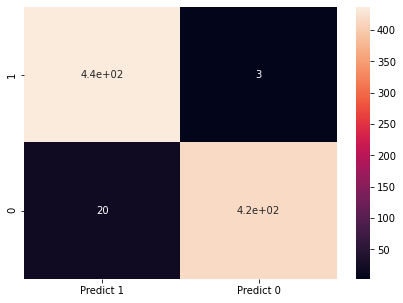

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50,min_samples_split = 9, min_samples_leaf = 1, max_features = 3, max_depth = None, criterion = 'gini', bootstrap = True)
rfcl = rfcl.fit(x_train, y_train)

y_pred = rfcl.predict(x_test)


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Logistic Regression after dimensional reduction using PCA

Confusion Matrix


<AxesSubplot:>

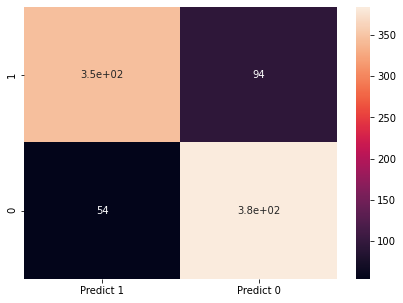

In [52]:
# Fit the model on train
LogReg = LogisticRegression(solver="liblinear")
LogReg.fit(x_train, y_train)

#predict on test
y_pred = LogReg.predict(x_test)


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [53]:
print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       440
           1       0.80      0.88      0.84       438

    accuracy                           0.83       878
   macro avg       0.83      0.83      0.83       878
weighted avg       0.83      0.83      0.83       878



### SVM Model after dimensional reduction using PCA

Confusion Matrix


<AxesSubplot:>

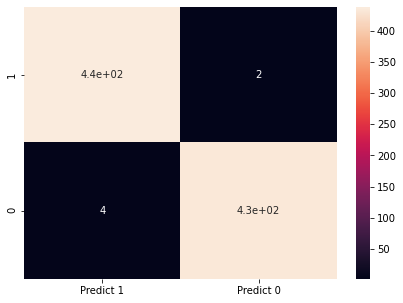

In [54]:
clf = svm.SVC(gamma=0.025, C=3)    
clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [55]:
# Apply K-Fold Validation with SVM
results = cross_val_score(clf,Xpca110, y, cv=kfold)
print('Accuracy Score :')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score :
Avearge:  0.9955584646313526
Standard deviation:  0.004839384777407311


In [56]:
clf = svm.SVC() 

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.025,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1, cv=kfold, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_std, y)

# summarize results
print("Best Score for SVM : %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Score for SVM : 0.996582 using {'C': 10, 'gamma': 0.025, 'kernel': 'rbf'}


Confusion Matrix


<AxesSubplot:>

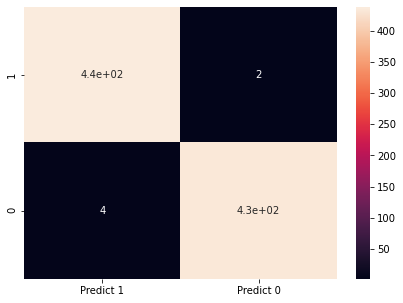

In [57]:
clf = svm.SVC(gamma=0.025, C=10, kernel='rbf')    
clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [58]:
print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       440
           1       1.00      0.99      0.99       438

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878



As Per all above detailed analysis SVM Model Provides the best result on both Train & Test Data, So we are using SVM Model as Best Fit Model. It's provide highest Accuracy Score


In [59]:
#Final Best SVM Model

clf = svm.SVC(gamma=0.025, C=10, kernel='rbf')    
clf.fit(x_train , y_train)

SVC(C=10, gamma=0.025)

In [60]:
# Pickle the selected model for future use

from sklearn import model_selection
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9931662870159453


In [61]:
# Import the future data file.
futuredata = pd.read_excel('Future_predictions.xlsx')

futuredata.head(18)

,Time,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5287,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.5816,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100,106.2400,0.1185,1.5153,...,0.0063,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100,106.2400,0.1185,1.5358,...,0.0045,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100,106.2400,0.1185,1.5381,...,0.0073,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


Initially we try to use PCA on Future data with 110 componets, so we got below Error.

n_components=110 must be between 0 and min(n_samples, n_features)=18 with svd_solver='full'

To avoid this Error, we mearge old data with future data & Apply PCA with 110 components & then split the future data from dataset

In [62]:
# Merge all datasets into one
New_data = pd.concat([futuredata,data],axis=0,sort=False)

In [63]:
print(New_data.size,New_data.shape)

1873470 (1585, 1182)


In [64]:
New_data.head(20)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Transform data into features and target
x = New_data.drop('Pass/Fail',axis=1) 
y = New_data['Pass/Fail']

In [66]:
# Replace Null values with 0
x = x.replace(np.NaN, 0)

# Explore for null values
x.isnull().any().any()

False

In [67]:
#Drop columns with very low standard deviation thresholds 
threshold = 0.1
x=x.drop(x.std()[x.std() < threshold].index.values, axis=1)

In [68]:
x = correlation(x,0.75)

# Drop Time column as it's not important for prediction
x.drop(columns='Time',axis=1, inplace=True)

x.head()

,0,21,24,59,72,155,195,419,468,484,...,551,559,562,564,569,571,572,581,585,589
0,3030.93,-5419.00,751.00,-1.7264,0.0000,0.41,0.292,0.0000,311.6377,494.6996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3095.78,-5441.50,-1640.25,0.8073,0.0000,0.35,0.222,368.9713,463.2883,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2932.61,-5447.75,-1916.50,23.8245,140.6972,0.47,0.139,0.0000,21.3645,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2988.72,-5468.25,-1657.25,24.3791,160.3210,0.35,0.139,0.0000,24.2831,305.7500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3032.24,-5476.25,117.00,-12.2945,0.0000,0.43,0.250,866.0295,44.8980,461.8619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# Perform normalisation
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_std = pd.DataFrame(StandardScaler().fit_transform(x))

In [70]:
#Apply PCA with 110 Dimensions

pca110 = PCA(n_components=110)
pca110.fit(X_std)
print(pca110.components_)
print(pca110.explained_variance_ratio_)
Xpca110 = pca110.transform(X_std)

[[ 0.2391732  -0.23136255 -0.05366945 ... -0.01296144 -0.02270402
  -0.02843155]
 [-0.00252942  0.00244584  0.00059197 ... -0.01640365  0.01211507
   0.02169596]
 [ 0.02843823 -0.02743331 -0.00701227 ...  0.00353978  0.00351542
   0.02861998]
 ...
 [-0.04312746  0.05716021 -0.0454439  ...  0.04638216 -0.04791196
  -0.09269641]
 [ 0.0013761   0.00204488 -0.00906541 ... -0.1644962   0.02969353
   0.07768011]
 [ 0.03170375 -0.03235103  0.01002782 ... -0.07701233  0.0341693
   0.12187898]]
[0.11433965 0.04058272 0.02591244 0.02137719 0.01868959 0.01842085
 0.01661647 0.01516801 0.01412177 0.01378693 0.01351134 0.01308172
 0.01277194 0.0127325  0.0125783  0.01229295 0.0120184  0.0114359
 0.01122287 0.01091629 0.01065202 0.01042998 0.01029114 0.01011629
 0.01007435 0.00997845 0.00997302 0.00945608 0.0091529  0.00904573
 0.00883982 0.00872123 0.00850695 0.00844872 0.0082314  0.00820223
 0.00805033 0.00791226 0.00776348 0.00775666 0.00768603 0.00752916
 0.00751491 0.00744661 0.00733083 0.00727

In [71]:
print(Xpca110.size,Xpca110.shape)

174350 (1585, 110)


In [72]:
future_data=pd.DataFrame(Xpca110)

In [73]:
future_data=future_data[:18]

In [74]:
future_data.head()

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,35.570109,-0.120765,0.769271,0.263358,0.063360,0.009141,0.268532,0.058913,-0.016425,0.000155,...,-1.858673,-0.090237,3.152250,-1.153675,4.166764,1.491916,0.778739,-1.116061,-0.037024,0.461281
1,34.785656,-0.110758,0.638909,0.199133,0.042587,0.006024,0.146664,0.017662,-0.057492,0.000125,...,1.782538,0.033128,-1.830237,0.678991,-1.611492,-0.169796,-0.089517,-0.731571,-0.690225,-0.227102
2,37.240279,-0.139624,1.005795,0.384457,0.106575,0.015741,0.584349,0.222400,0.451579,-0.000619,...,0.050339,0.116312,0.100397,-0.402701,1.280655,0.532372,1.338165,-0.594471,0.964639,1.481959
3,42.039032,-0.195891,1.707063,0.729658,0.221477,0.032983,1.324031,0.538014,1.132531,-0.001694,...,-0.821389,-0.048995,0.722318,-0.096756,0.032884,-0.193147,-0.563614,0.522127,-0.073331,-0.514558
4,36.650459,-0.130782,0.857652,0.293518,0.068869,0.009888,0.266354,0.038643,-0.114979,0.000342,...,0.162644,0.038494,-0.664177,0.134328,-0.819852,-0.385050,0.108242,0.429243,0.448464,0.312810


In [75]:
Prediction = loaded_model.predict(future_data)

In [76]:
futuredata['Passs/Fail']=Prediction

In [77]:
futuredata.head(20)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Passs/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5287,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,0
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.5816,...,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,0
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100,106.2400,0.1185,1.5153,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,0
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100,106.2400,0.1185,1.5358,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,0
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100,106.2400,0.1185,1.5381,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,0


## 6. Conclusion and improvisation:

As Per the Observation, SVM model provides the best Accuracy on both Training & Test data set, So it should be the best Model.

# Thanks You